# demonstrando o Teorema do limite central via python

### usando diferentes distriuições, iremos pegar diferentes amostras e plotar suas médias para ver se realmente se aproximam a distribuição normal


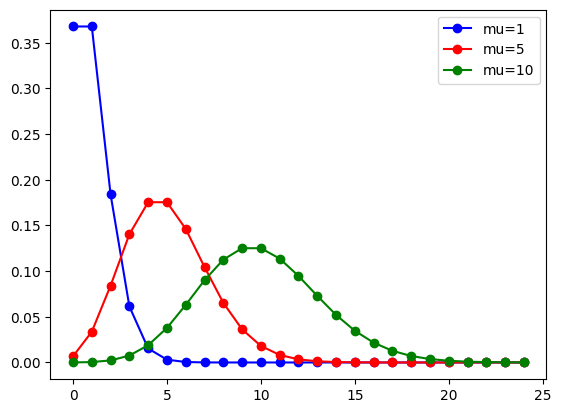

In [83]:
# plotando a distribuição de poisson
# link fonte do código: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

import numpy as np
from scipy.stats import poisson, norm
import matplotlib.pyplot as plt
import random

# lambda
mu1 = 1
mu2 = 5
mu3 = 10


n = 25
# fução ppf pega pontos a partir da probabilidade deles (inverso da cdf)
# x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
x = np.arange(0, n)

y1 = poisson.pmf(x, mu1)
y2 = poisson.pmf(x, mu2)
y3 = poisson.pmf(x, mu3)

plt.plot(x, y1, "o-", color="blue", label=f"mu={mu1}")
plt.plot(x, y2, "o-", color="red", label=f"mu={mu2}")
plt.plot(x, y3, "o-", color="green", label=f"mu={mu3}")
plt.legend()
plt.show()


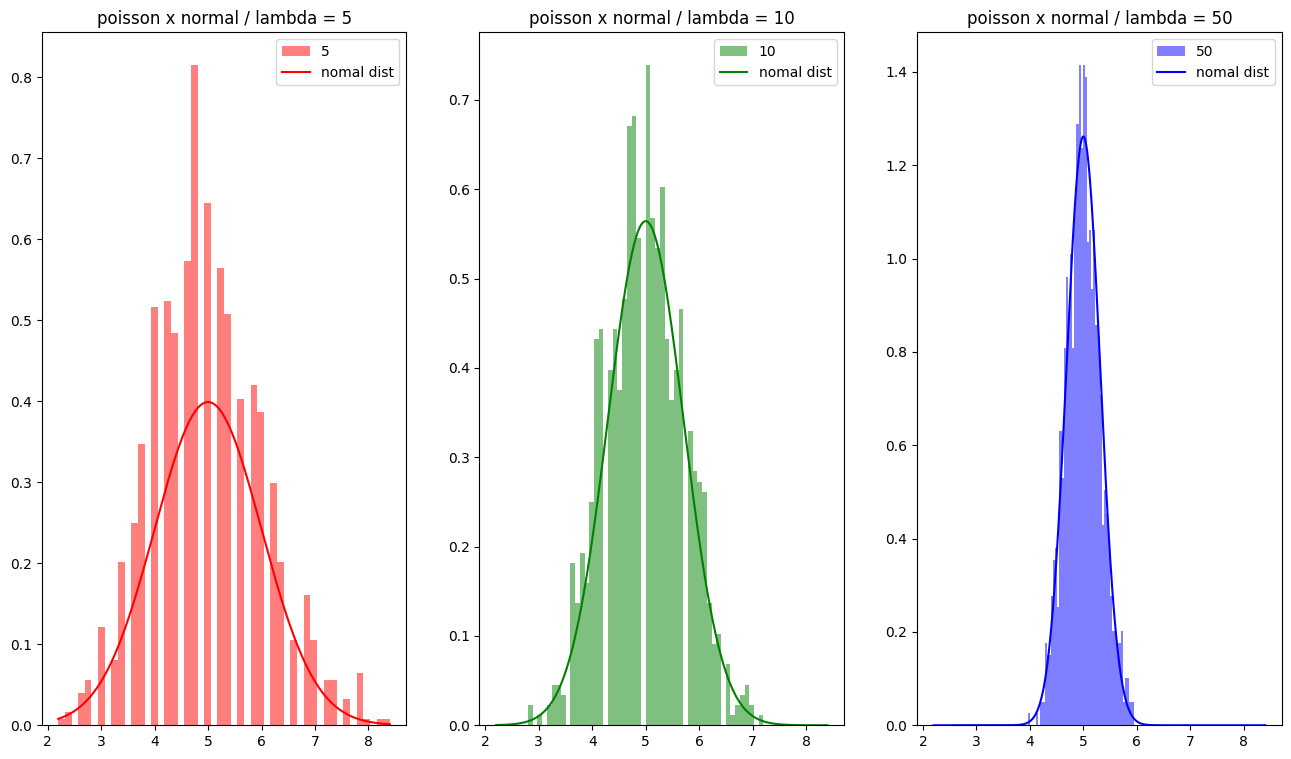

In [127]:
_lambda = 5
population_size = 100_000
num_samples = 1000
sample_sizes = [5, 10, 50]
fig, subplots = plt.subplots(1, 3, figsize=(16, 9))


# pegando numero grandes de pontos com distribuição de poisson
poisson_data = poisson.rvs(mu=_lambda, size=population_size)


# pegando amostras aleatorias
def get_samples(l, num_samples, sample_size):
    return [random.sample(l, sample_size) for _ in range(num_samples)]


def get_mean_from_samples(l, num_samples, sample_size):
    means = []
    for sample in get_samples(l, num_samples, sample_size):
        means.append(sum(sample) / len(sample))
    return means


sample_means = {}

for sample_size in sample_sizes:
    sample_means[sample_size] = get_mean_from_samples(list(poisson_data), num_samples, sample_size)


colors = ["red", "green", "blue"]

for dict_items, color, subplot in zip(sample_means.items(), colors, subplots):
    sample_size, means_data = dict_items
    subplot.set_title(f"poisson x normal / lambda = {sample_size}")
    subplot.hist(means_data, bins=50, density=True, alpha=0.5, label=sample_size, color=color)


# # na distribuição temos os seguintes parametros
# valor esperado: lambda
# varianca: lambda
# temos que ajustes esses parametros para a curva da distribuição normal, onde:
# valor esperado normal: lambda
# variancia normal = lambda
# desvio padrão = desvio padrão / sqrt(tamanho amostra) = sqrt(lambda) / sqrt(tamanho amostra) = sqrt(lambda / tamanho amostra)

# obs: para obter desvio padrão de uma amostra temos q fazer: desvio padrão / sqrt(tamanho amostra)
# link: https://www.omnicalculator.com/statistics/standard-deviation-sample-mean#:~:text=To%20find%20the%20standard%20deviation%20of%20the%20sample%20mean%20(%CF%83,X%CC%84%20%3D%20%CF%83%2F%E2%88%9An.

# como a curva que tem 5 amostras é a tem os valores extremos, ela que será usados para o x
x = np.linspace(min(sample_means[5]), max(sample_means[5]), num_samples)
mean_sample_size = sum(sample_sizes) / len(sample_sizes)


for sample_size, color, subplot in zip(sample_sizes, colors, subplots):
    normal_dist_data = norm.pdf(x, loc=_lambda, scale=np.sqrt(_lambda/sample_size))
    subplot.plot(x, normal_dist_data, color=color, label="nomal dist")


for subplot in subplots:
    subplot.legend()


plt.show()
# print(sample_size)